# 서포트 벡터 머신

## 분류
* sklearn.svm.LinearSVC
* sklearn.svm.SVC

## 회귀
* sklearn.svm.LinearSVR
* sklearn.svm.SVR


In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split


iris = load_iris()
X = iris['data'][:, (2, 3)]
y = (iris['target'] == 2).astype(np.float64)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipe = Pipeline([
    ('scaler', StandardScaler()),
])

# 특성스케일링 필요함 (hinge: error가 거리)
X_train_zs = pipe.fit_transform(X_train)
X_test_zs = pipe.transform(X_test)
svm_clf = LinearSVC()
svm_clf.fit(X_train_zs, y_train)
print('train: ', svm_clf.score(X_train_zs, y_train))
print('test: ', svm_clf.score(X_test_zs, y_test))

train:  0.95
test:  1.0


In [3]:
y_pred = svm_clf.predict([[5.5, 1.7]])
y_pred

array([1.])

In [4]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
iris['target_names'][int(y_pred.round())]

'versicolor'

## SVM에서는 커널트릭 사용이 가능한데, linear, poly, rbf, sigmoid

In [19]:
from sklearn.svm import SVC, SVR
SVC?

In [20]:
SVR?

In [21]:
X_train_zs.shape, X_test_zs.shape

((120, 2), (30, 2))

In [22]:
polysvc = SVC(kernel='poly', degree=2, gamma=1, coef0=0.0)
polysvc.fit(X_train_zs, y_train)
polysvc.score(X_test_zs, y_test)

0.7

In [23]:
polysvc = SVC(kernel='poly', degree=10, gamma=1, coef0=0.0)
polysvc.fit(X_train_zs, y_train)
polysvc.score(X_test_zs, y_test)

0.8

In [24]:
rbfsvc = SVC(kernel='rbf',gamma=1)
rbfsvc.fit(X_train_zs, y_train)
rbfsvc.score(X_test_zs, y_test)

1.0

# 자율학습기 (k-평균 군집화)

In [10]:
from sklearn import cluster, datasets
iris = datasets.load_iris()
X = iris['data']
# y = iris['target'] 

# 거리를 지표로 사용하므로 특성스케일링 필요
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 자율학습이므로 훈련셋/시험셋 나누기 불필요.
# 평가도 불필요.

kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(X_scaled)

# 대신, 시각화, 최적의 파라미터 튜닝

KMeans(n_clusters=3)

# 대신, 시각화, 최적의 파라미터 튜닝

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [16]:
X_pca.shape

(150, 2)

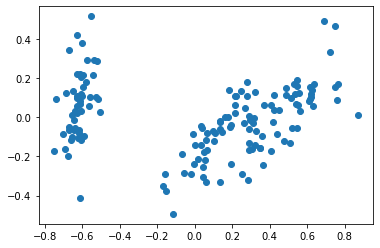

In [17]:
import matplotlib.pyplot as plt
plt.scatter(X_pca[:, 0], X_pca[:, 1])

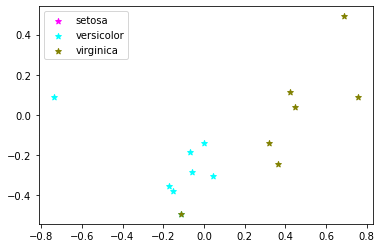

In [38]:
# 시각화로 군집화를 확인
import numpy as np
import matplotlib.pyplot as plt

# kmeans 군집별 인덱스 구하기
index0  = np.where(kmeans.labels_ == 0)[0]
index1  = np.where(kmeans.labels_ == 1)[0]
index2  = np.where(kmeans.labels_ == 2)[0]

y = iris['data']
labels0 = np.where(y == 0)[0]
labels1 = np.where(y == 1)[0]
labels2 = np.where(y == 2)[0]

# kmeans 군집별 산점도 시각화
plt.scatter(X_pca[index0, 0], X_pca[index0, 1], color='red', label='cluster 0', alpha=0.3, s=100)
plt.scatter(X_pca[index1, 0], X_pca[index1, 1], color='blue', label='cluster 1', alpha=0.3, s=100)
plt.scatter(X_pca[index2, 0], X_pca[index2, 1], color='green', label='cluster 2', alpha=0.3, s=100)

# plt.scatter(X_pca[labels0, 0], X_pca[labels0, 1], marker='*', color='magenta', label='setosa')
# plt.scatter(X_pca[labels1, 0], X_pca[labels1, 1], marker='*', color='cyan', label='versicolor')
# plt.scatter(X_pca[labels2, 0], X_pca[labels2, 1], marker='*', color='olive', label='virginica')

plt.legend(loc='best')
plt.show()

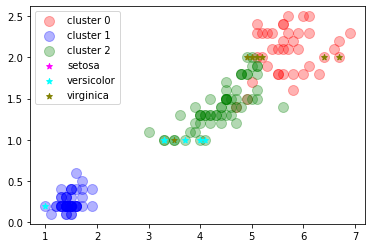

In [42]:
# 시각화로 군집화를 확인
import numpy as np
import matplotlib.pyplot as plt

# kmeans 군집별 인덱스 구하기
index0  = np.where(kmeans.labels_ == 0)[0]
index1  = np.where(kmeans.labels_ == 1)[0]
index2  = np.where(kmeans.labels_ == 2)[0]

y = iris['data']
labels0 = np.where(y == 0)[0]
labels1 = np.where(y == 1)[0]
labels2 = np.where(y == 2)[0]

# kmeans 군집별 산점도 시각화
plt.scatter(X[index0, 2], X[index0, 3], color='red', label='cluster 0', alpha=0.3, s=100)
plt.scatter(X[index1, 2], X[index1, 3], color='blue', label='cluster 1', alpha=0.3, s=100)
plt.scatter(X[index2, 2], X[index2, 3], color='green', label='cluster 2', alpha=0.3, s=100)

plt.scatter(X[labels0, 2], X[labels0, 3], marker='*', color='magenta', label='setosa')
plt.scatter(X[labels1, 2], X[labels1, 3], marker='*', color='cyan', label='versicolor')
plt.scatter(X[labels2, 2], X[labels2, 3], marker='*', color='olive', label='virginica')

plt.legend(loc='best')
plt.show()

In [49]:
kmeans.score?

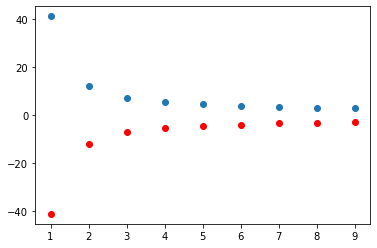

In [53]:
from sklearn.cluster import KMeans

sse = []
scores = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)
    scores.append(kmeans.score(X_scaled))
plt.scatter(range(1, 10), sse)
plt.scatter(range(1, 10), scores, color='red')
plt.show()

# 신경망을 위한 실습환경구축

* 넘파이 다운그레이드 후 텐서플로우와 케라스 설치
아래 명령어는 아나콘다 프롬프트에서 실행할 것
    - conda activate lgchem
    - conda install -c conda-forge numpy=1.19
    - pip install --user tensorflow==2.3
    - pip install --user keras==2.3